In [18]:
import numpy as np
from floweaver import * 
from modules.algorithms import UtilityMatrix
from modules.agents import Population
from modules.simulator import Simulator
from modules.rewardsFunctions import RewardFunctionExponential, RewardFunctionSquaredExponential
from modules.samplers import UniformSamplerRecommendation, GaussianSamplerRecommendation, MixtureGaussianSamplerRecommendation
from modules.samplers import UniformSamplerOpinion, GaussianSamplerOpinion, MixtureGaussianSamplerOpinion
from modules.parameters import ParametersUser, ParametersPopulation
from modules.basic import Opinion

Basic parameters

In [19]:
reward = RewardFunctionSquaredExponential(decay_parameter=1.0)
recommendation_sampler = UniformSamplerRecommendation(low=-1.0, high=1.0)
# recommendation_sampler = MixtureGaussianSamplerRecommendation(mean=[-1.0, 1.0], std=[0.1, 0.1])
opinion_sampler_1 = UniformSamplerOpinion(low=-2.0, high=2.0)
opinion_sampler_2 = UniformSamplerOpinion(low=-0.0, high=2.0)

Define parameters of the population

In [20]:
parameters = ParametersUser(prejudice=0.0,
                            weight_prejudice=0.0,
                            weight_recommendation=0.4,
                            weight_current_opinion=0.6,
                            reward=reward)
parameters_population = ParametersPopulation(parameters=parameters,
                                             repeat=1000)

# Define population
population_1 = Population(parameters=parameters_population,
                          initial_state=opinion_sampler_1,
                          save_history=True)

Augment population

In [21]:
parameters = ParametersUser(prejudice=0.0,
                            weight_prejudice=0.0,
                            weight_recommendation=0.1,
                            weight_current_opinion=0.9,
                            reward=reward)
parameters_population = ParametersPopulation(parameters=parameters,
                                             repeat=1000)

# Define population
population_2 = Population(parameters=parameters_population,
                          initial_state=opinion_sampler_2,
                          save_history=True)
# Sum populations
population = population_1 + population_2
# population = population_1

Define algorithm

In [22]:
alg = UtilityMatrix(n_agents=population.n_agents(),
                    recommendation_sampler=recommendation_sampler,
                    exploration_probability=None,
                    exploration_frequency=5,
                    save_history=True)

Run simulations and make plots

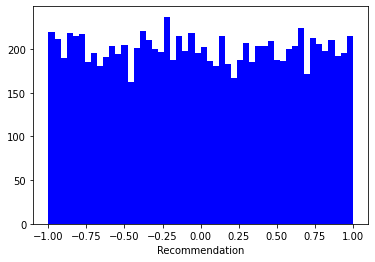

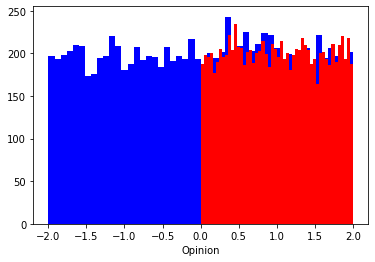

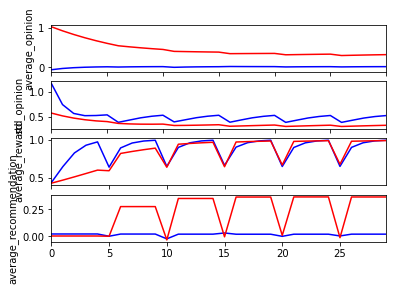

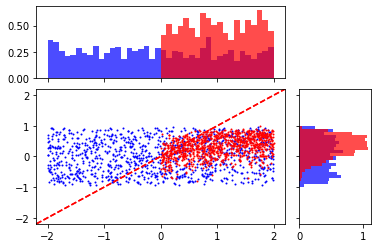

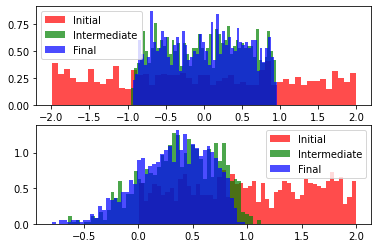

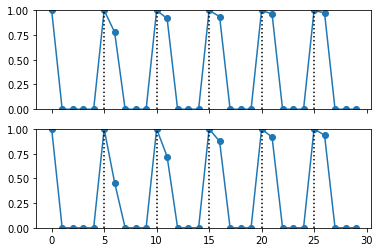

In [23]:
# Simulator
simulator = Simulator(agent=population,
                      algorithm=alg)

# Run
simulator.run(horizon=30,
              initialize=True)

# Plot
recommendation_sampler.plot(show=True)
opinion_sampler_1.plot(show=False, color='blue')
opinion_sampler_2.plot(show=True, color='red')
sankey_plot_data = simulator.agent.plot(save=False, name='sim_identical')
simulator.algorithm.plot(save=False, name='sim_identical')

# Save data (still to improve)
simulator.agent.save_trajectory_to_file(name='data', folder='results')

In [24]:
# Plot (needs to be in a separate cell)
weave(sankey_plot_data[0], dataset=sankey_plot_data[1]).to_widget()
# weave(sankey_plot_data[0], dataset=sankey_plot_data[1]).to_widget().auto_save_png('test.png')

SankeyWidget(groups=[{'id': 'start', 'type': 'process', 'title': '', 'nodes': ['start^-1.0', 'start^-0.5', 'st…

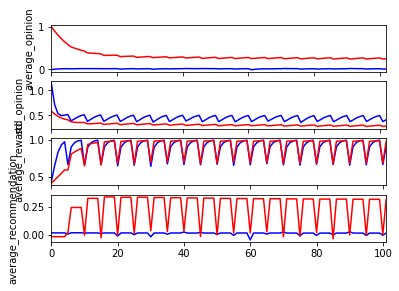

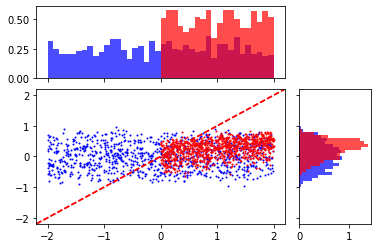

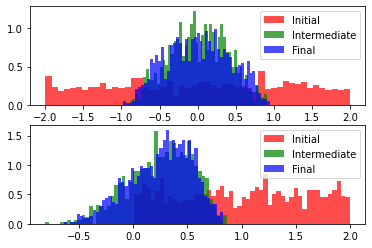

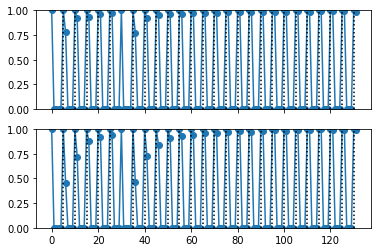

In [25]:
# Continue simulation
simulator.run(horizon=102,
              initialize=True)

# Plot
simulator.agent.plot(save=False, name='sim_identical')
simulator.algorithm.plot(save=False, name='sim_identical')

# Save data (still to improve)
simulator.agent.save_trajectory_to_file(name='data', folder='results')